In [1]:
import numpy
import matplotlib.pyplot as plt
from scipy import stats
from scipy.integrate import trapz
import pandas
import seaborn

%matplotlib inline
numpy.random.seed(2012265)

1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


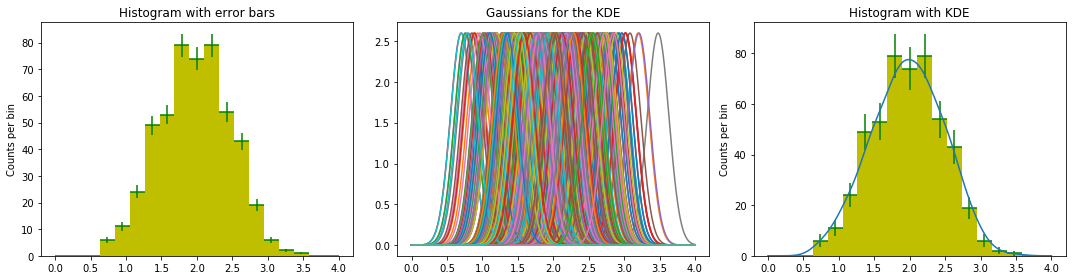

In [2]:
N, mu, sigma = 500, 2, 0.5
x = sigma * numpy.random.randn(N) + mu

fig, ax = plt.subplots(1,3)
binedges = numpy.linspace(mu-4*sigma, mu+4*sigma, 20)
y, _, _ = ax[0].hist(x, bins=binedges, color='y')
ax[0].set_ylabel("Counts per bin")
ax[0].set_title("Histogram with error bars")
bincenters = 0.5 * (binedges[1:] + binedges[:-1])
ax[0].bar(bincenters, y, 0, xerr=0.5*(binedges[1:]-binedges[:-1]), yerr=numpy.sqrt(y)/2, ecolor='g')

gaussians = numpy.array( [stats.norm(mu, 1.06*x.std()*x.size**-0.2) for mu in x] )
test = numpy.linspace(mu-4*sigma, mu+4*sigma, N)
values = numpy.array( [i.pdf(test) for i in gaussians] )

for i in values:
    ax[1].plot(test, i)
ax[1].set_title("Gaussians for the KDE")

kde = numpy.sum(values, axis=0)
kde = kde / (trapz(kde, x=test)) * (trapz(y, x=bincenters))
ax[2].plot(test, kde)
ax[2].hist(x, bins=binedges, color='y')
ax[2].bar(bincenters, y, 0, xerr=0.5*(binedges[1:]-binedges[:-1]), yerr=numpy.sqrt(y), ecolor='g')
ax[2].set_ylabel("Counts per bin")
ax[2].set_title("Histogram with KDE")

fig.set_figwidth(15)
fig.tight_layout()

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

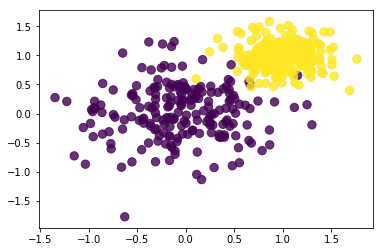

In [3]:
from IPython.display import Image
Image('two_categories_scatter_plot.png')

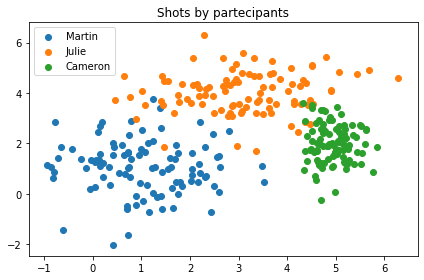

In [4]:
categories = ["Martin", "Julie", "Cameron"]
mean = [[1,1], [3,4], [5,2]]
cov = [ [[1, 0], [0, 1]], [[1.5, 0], [0, 0.8]], [[0.1, 0], [0, 0.5]] ]

dataset = numpy.array([numpy.random.multivariate_normal(mean[i], cov[i], 100) for i in range(3)])

fig, ax = plt.subplots(1)
for i,j in enumerate(dataset):
    ax.scatter(j[:,0], j[:,1], label=categories[i])
ax.legend()
ax.set_title("Shots by partecipants")
fig.tight_layout()

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

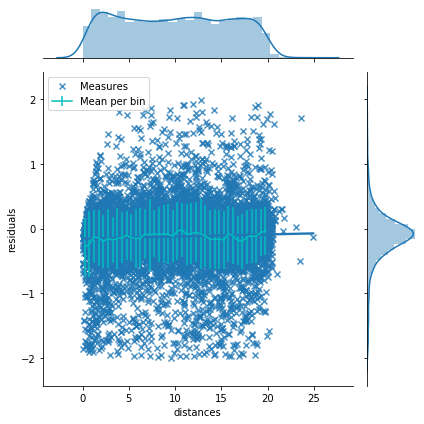

In [5]:
# loading the dataset from the file
data_from_file = numpy.load("residuals_261.npy", allow_pickle=True)
dataset = pandas.DataFrame(data_from_file.item())

# cleaning the dataset
dataset = dataset[ numpy.abs(dataset['residuals']) < 2 ]

# perform the linear regression
regr_param = stats.linregress(dataset['distances'], dataset['residuals'])

# seaborn jointplot
seaplot = seaborn.jointplot(x='distances', y='residuals', data=dataset, kind='reg', marker='x', label="Measures")

# filling up the 3 arrays
x = numpy.linspace(0, 20, 41) # bin width = 0.5
y = [ numpy.mean( dataset[numpy.logical_and(dataset['distances']<x[i], dataset['distances']>x[i-1])]['residuals'].values ) for i in range(1, x.size) ]
erry = [ numpy.std( dataset[numpy.logical_and(dataset['distances']<x[i], dataset['distances']>x[i-1])]['residuals'].values ) for i in range(1, x.size) ]

# profile 
plt.errorbar((x[1:]+x[:-1])/2, y, yerr=erry, color='c', label="Mean per bin")
plt.legend()
plt.tight_layout()